In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [124]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)
y = y + abs(y**2/0.15)

In [125]:
print(x.shape)
y = y.reshape((x.shape[0], 1))
print(y.shape)

(100, 2)
(100, 1)


# Normalisation des données

In [126]:
norm = StandardScaler()
x = norm.fit_transform(x)

In [127]:
x1 = x[:, 0]
x2 = x[:, 1]
x1 = x1.reshape((x.shape[0], 1))
x2 = x2.reshape((x.shape[0], 1))

In [128]:
# Visualisation
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter3d(
        x=x1.ravel(), y=x2.ravel(), z=y.ravel(),
        mode='markers',
        marker=dict(size=4, color='orange')
    )
)

fig.update_layout(
    scene={
        "xaxis_title":"X1",
        "yaxis_title":"X2",
        "zaxis_title":"Y"
    }
)

fig.show()

In [129]:
x1 = x1.reshape((x.shape[0], 1))
x2 = x2.reshape((x.shape[0], 1))
y = y.reshape((x.shape[0], 1))
print(x1.shape)
print(x2.shape)
print(y.shape)

(100, 1)
(100, 1)
(100, 1)


In [130]:
class LinearRegularRegression:
    def __init__(self, x_, regular_param=1, norm_type="ridge", alpha=0.5):
        _, n = x_.shape
        self.theta_ = np.random.rand(n+1, 1)
        self.regular_param = regular_param
        self.norm_type = norm_type
        self.alpha = alpha

    def predict(self, x_):
        m, _ = x_.shape
        X_ = np.hstack(( x_, np.ones((m, 1)) ))
        return X_ @ self.theta_

    def cost_function(self, fx_, y_):
        m, _ = y_.shape
        if self.norm_type=="ridge":
            return 1/(2*m) * (np.sum( (fx_ - y_)**2 ) + self.regular_param * np.sum(abs(self.theta_)))
        if self.norm_type=="lasso":
            return 1/(2*m) * (np.sum( (fx_ - y_)**2 ) + self.regular_param * np.sum(self.theta_ ** 2))
        if self.norm_type=="elasticnet":
            return 1/(2*m) * (np.sum( (fx_ - y_)**2 ) + self.regular_param * (self.alpha * np.sum(abs(self.theta_)) + ((1-self.alpha)/2) * np.sum(self.theta_**2) ))

    def fit(self, x_, y_, learning_rate=0.01, n_iterations=1000):
        m, _ = x_.shape
        X_ = np.hstack((x_, np.ones((m, 1))))
        cost_history = np.zeros(n_iterations)

        for i in range(0, n_iterations):
            self.theta_ = self.theta_ - learning_rate * ((1/m) * X_.transpose() @ (self.predict(x_) - y_))
            cost_history[i] = self.cost_function(self.predict(x_), y_)
        return cost_history



In [151]:
regular_linear_reg = LinearRegularRegression(x, norm_type="elasticnet")
J_history = regular_linear_reg.fit(x, y)

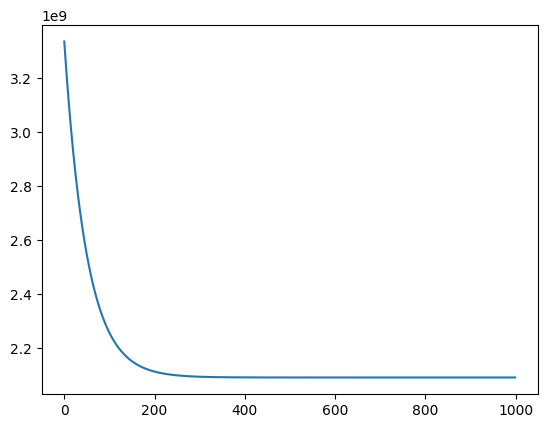

In [152]:
plt.plot(J_history)
plt.show()

In [153]:
y_pred = regular_linear_reg.predict(x)

In [154]:
a, b, c = regular_linear_reg.theta_

f(x) = ax² + bx + c

In [155]:
# Visualisation
import plotly.graph_objects as go

fig = go.Figure()

x1_list = np.linspace(x1.min(), x1.max(), 20)
x2_list = np.linspace(x2.min(), x2.max(), 20)
x1_list, x2_list = np.meshgrid(x1_list, x2_list)

y_pred_list = a * x1_list**2 + b * x2_list + c

fig.add_trace(
    go.Scatter3d(
        x=x1.ravel(), y=x2.ravel(), z=y.ravel(),
        mode='markers',
        marker=dict(size=4, color='yellow')
    ))

fig.add_trace(
    go.Surface(
        x=x1_list, y=x2_list, z=y_pred_list,
        colorscale="Reds", opacity=0.5
    ))

fig.update_layout(
    scene={
        "xaxis_title":"X1",
        "yaxis_title":"X2",
        "zaxis_title":"Y"
    }
)

fig.show()